In [30]:
#Ordinal
import pandas as pd
data = {"grade" : ['A', 'B', 'C', 'D','E', 'F']}
df = pd.DataFrame(data)
grade_map = {"A": "100-90", "B": "89-80", "C": "79-70", "D": "69-60", "E": "59-50", "F": "49-0"}
df["Num Range"] = df["grade"].map(grade_map)
display(df)

,grade,Num Range
0,A,100-90
1,B,89-80
2,C,79-70
3,D,69-60
4,E,59-50
5,F,49-0


In [7]:
# Binding Continuos Variable
import numpy as np
import pandas as pd
df = pd.DataFrame({'Price' : [10000, 20000, 30000, 40000, 50000000, 600000000, 12000, 34500, 123456]})
bins = [-np.inf, 10000 ,35000, 60000, 100000, np.inf]
labels = ["Very Low", "Low", "Medium", "High", "Very High"]
df["Price Category"] = pd.cut(df["Price"], bins = bins, labels = labels)
display(df)

,Price,Price Category
0,10000,Very Low
1,20000,Low
2,30000,Low
3,40000,Medium
4,50000000,Very High
5,600000000,Very High
6,12000,Low
7,34500,Low
8,123456,Very High


In [8]:
#Review Star Patterns
import numpy as np
import pandas as pd
df = pd.DataFrame({'Reviews' : [7.6, 6.5, 3.4, 9.0, 6.9, 5.7, 7.5, 5.9, 4.6]})
bins = [0, 1, 2, 3 , 4, 5, 6, 7, 8, 9, 10]
labels = ["One Stars", "Two Stars", "Three Stars", "Four Stars", "Five Stars", "Six Stars", "Seven Stars", "Eight Stars", "Nine Stars", "10 Stars"]
df["Rating Category"] = pd.cut(df["Reviews"], bins = bins, labels = labels)
display(df)

,Reviews,Star Category
0,7.6,Eight Stars
1,6.5,Seven Stars
2,3.4,Four Stars
3,9.0,Nine Stars
4,6.9,Seven Stars
5,5.7,Six Stars
6,7.5,Eight Stars
7,5.9,Six Stars
8,4.6,Five Stars


In [18]:
#Featue Extraction  -------->> PCA Example using the Imported Dataset

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
# display(iris)
X = iris.data

#Applying PCA
# pca = PCA(n_components = 0)
# pca = PCA(n_components = 1)
pca = PCA(n_components = 2)   

#Processes for Creation of New Dataset
X_pca = pca.fit_transform(X)
print(X.shape)
print(X_pca.shape)

PCA(n_components=2)
(150, 4)
(150, 2)


In [29]:
#Featue Extraction  -------->> PCA Example using the BTissue Dataset

import pandas as pd
from sklearn.decomposition import PCA

d1 = pd.read_csv("btissue.csv")
d1 = pd.get_dummies(d1,drop_first=False)
# display(d1)

#Applying PCA
# pca = PCA(n_components = 0)
# pca = PCA(n_components = 1)
pca = PCA(n_components = 5)   

#Processes for Creation of New Dataset
d1_pca = pca.fit_transform(d1)
print(d1.shape)
print(d1_pca.shape)

(106, 15)
(106, 5)


In [51]:
#                       ------------>>>    SVD
import numpy as np
from sklearn.decomposition import TruncatedSVD

#RANDOM MATRIX
# X = np.random.rand(4,5)
X = np.arange(0,1000, 20).reshape(10,5)
print(X)

#Applying
svd = TruncatedSVD(n_components = 2)
X_svd = svd.fit_transform(X)
print(X.shape)
print(X_svd.shape)

[[  0  20  40  60  80]
 [100 120 140 160 180]
 [200 220 240 260 280]
 [300 320 340 360 380]
 [400 420 440 460 480]
 [500 520 540 560 580]
 [600 620 640 660 680]
 [700 720 740 760 780]
 [800 820 840 860 880]
 [900 920 940 960 980]]
(10, 5)
(10, 2)


In [57]:
#                       ------------>>>    SVD Example using the BTissue Dataset

import pandas as pd
from sklearn.decomposition import TruncatedSVD

d1 = pd.read_csv("btissue.csv")
d1 = pd.get_dummies(d1,drop_first=False)
# display(d1)

#Applying 
svd = TruncatedSVD(n_components = 2)

#Processes for Creation of New Dataset
d1_svd = svd.fit_transform(d1)
print(d1.shape)
print(d1_pca.shape)

(106, 15)
(106, 5)


In [54]:
#LDA 
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
lda =LinearDiscriminantAnalysis(n_components = 2)
X_lda = lda.fit_transform(X, y)
print(X.shape)
print(X_lda.shape)

(150, 4)
(150, 2)


(150, 2)


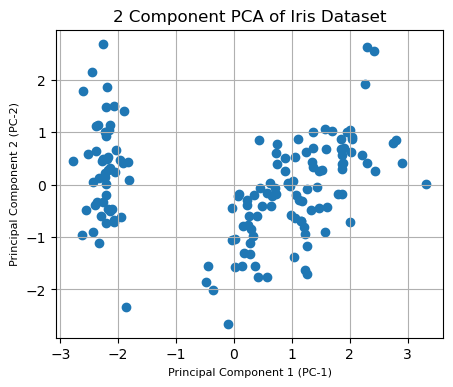

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
predictors = iris.data[:, 0:4]
target = iris.target
# display(predictors)

#Standard Scalers happens to work as the Scaling property to 
predictors = StandardScaler().fit_transform(predictors)
# display(predictors)

pca = PCA(n_components = 2)
Principal_Components_1 = pca.fit_transform(predictors)
Principal_Components_1_DataSet = pd.DataFrame(data = Principal_Components_1, columns = ["PC-1", "PC-2"])
print(Principal_Components_1_DataSet.shape)


#Scatter Plot for the PC-1 and PC-2 Datas
plt.figure(figsize = (5, 4))
# Use the 'target' column to color the points
scatter = plt.scatter(
    Principal_Components_1_DataSet['PC-1'],
    Principal_Components_1_DataSet['PC-2']
)

plt.xlabel('Principal Component 1 (PC-1)', fontsize = 8)
plt.ylabel('Principal Component 2 (PC-2)', fontsize = 8)
plt.title('2 Component PCA of Iris Dataset', fontsize = 12)


plt.grid()
plt.show() # Display the plot

In [78]:
import pandas as pd
from sklearn import datasets
from scipy.linalg import svd
iris = datasets.load_iris()
predictors = iris.data[:, 0:4]
U, s, VT = svd(predictors)
print(U)

[[-0.06161685  0.12961144  0.0021386  ... -0.09343429 -0.09573864
  -0.08085465]
 [-0.05807094  0.11101978  0.07067239 ...  0.03690405 -0.03153954
   0.01309526]
 [-0.05676305  0.11796647  0.00434255 ...  0.03066199  0.19531473
   0.13569909]
 ...
 [-0.0940593  -0.0498297  -0.04144001 ...  0.98181631 -0.02194514
  -0.00894446]
 [-0.09488961 -0.05610123 -0.21297821 ... -0.02155617  0.94178018
  -0.02971961]
 [-0.08847836 -0.0515697  -0.09575285 ... -0.0086052  -0.03021088
   0.9736599 ]]
